<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/Random_forest_Water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


we are focusing on building and analyzing a Random Forest model to solve a classification problem related to determining the safety of environmental samples. The primary goal is to predict whether a given sample is safe or unsafe based on its chemical composition. The dataset contains 21 features, including levels of various chemicals such as aluminium, ammonia, arsenic, and lead, and a target label indicating whether the sample is "safe" or "unsafe."

##Problem Statement

The task is to utilize the Random Forest algorithm to extract meaningful insights from the data and create a predictive model that can classify samples accurately. By employing Random Forest techniques, the aim is to construct a robust model that learns decision rules from the data, generalizes well to unseen samples, and identifies the most important features driving the classification.

##Objective

####Understand Random Forest Principles:
 Grasp the foundational concepts of Random Forest and its advantages over individual decision trees, such as better generalization and reduced overfitting.

####Data Exploration:
Perform exploratory data analysis (EDA) to understand the dataset, detect patterns, and preprocess it for modeling.

####Model Building:
Implement the Random Forest classifier, optimize hyperparameters, and evaluate the model using key performance metrics such as accuracy, precision, recall, and the F1 score.

####Feature Importance Analysis:
Identify which features play a significant role in predicting whether a sample is safe or unsafe.

####Hyperparameter Tuning:
Use techniques like GridSearchCV to fine-tune the model's hyperparameters, ensuring the best possible performance.

By completing this work, we will develop a better understanding of how to apply Random Forest for classification tasks, perform model evaluation, and interpret the results to draw meaningful conclusions from real-world datasets.

In [27]:
# importing libraries
from pandas import read_csv
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,cross_val_score

from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#import the datasets
df = pd.read_csv("/content/waterQuality1.csv")

In [29]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [30]:
df.ndim

2

In [31]:
df.size

167979

In [32]:
df.shape

(7999, 21)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [34]:
df.duplicated().sum()

0

In [35]:
df.isnull().sum().sum()

0

In [36]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [37]:
unique_values = df['is_safe'].unique()
print(unique_values)

['1' '0' '#NUM!']


In [38]:
# Replace '#NUM!' with NaN
df['is_safe'] = df['is_safe'].replace('#NUM!', np.nan)

# Drop rows with NaN values
df = df.dropna()

In [39]:
print(df.isnull().sum())  # Should return 0 for all columns

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

#Visualizations and insights

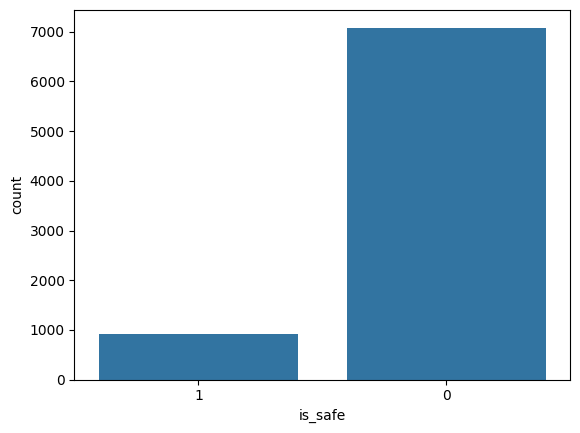

In [41]:
# Check the distribution of 'is_safe'
sns.countplot(x='is_safe', data=df)
plt.show()

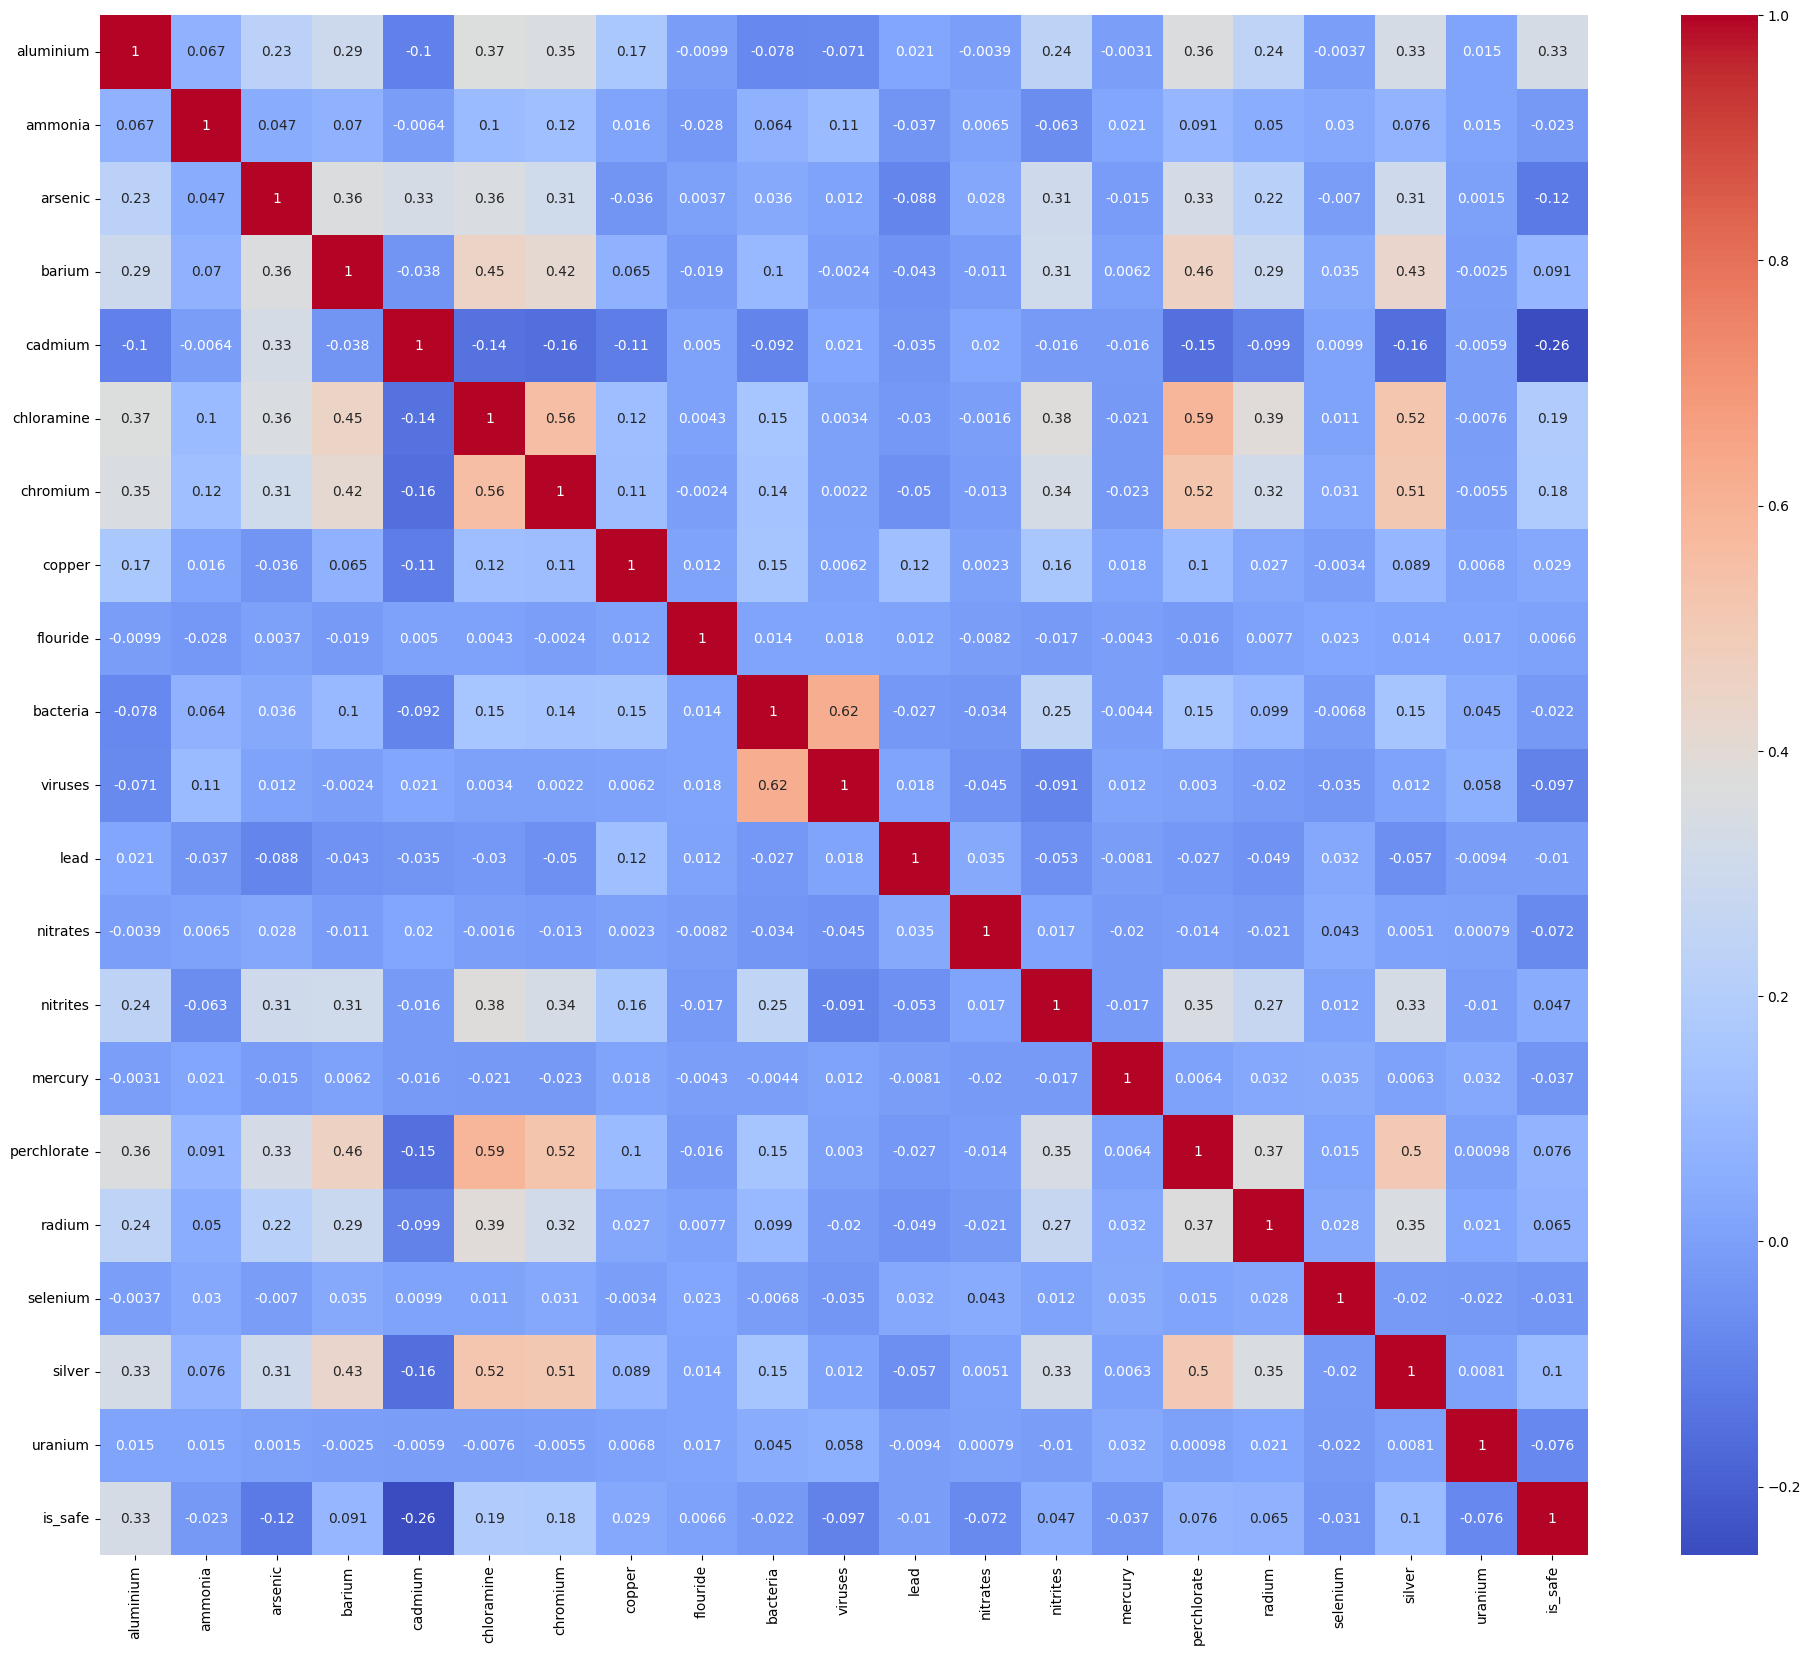

In [42]:
# Correlation matrix to see relationships between numerical features
corr_matrix = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#ML Algorithm Random Forest

In [43]:
# Splitting data into features and target
X = df.drop('is_safe', axis=1)
y = df['is_safe']

In [44]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model with default hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Predictions
y_pred = rf_classifier.predict(X_test)

In [47]:
#since next code showing error due to difference in datatype
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9508128386827845
Precision: 0.9398148148148148
Recall: 0.6590909090909091
F1 Score: 0.7748091603053435
Confusion Matrix:
 [[2078   13]
 [ 105  203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2091
           1       0.94      0.66      0.77       308

    accuracy                           0.95      2399
   macro avg       0.95      0.83      0.87      2399
weighted avg       0.95      0.95      0.95      2399



The model performs exceptionally well at identifying the majority class (0), with high accuracy, precision, and recall for that class.

 The model struggles with the minority class (1), reflected in its lower recall (66%). This means it's missing a significant portion of the 1s.

 so next we need to tune the Random Forest model (e.g., adjusting the class weights, hyperparameter tuning).

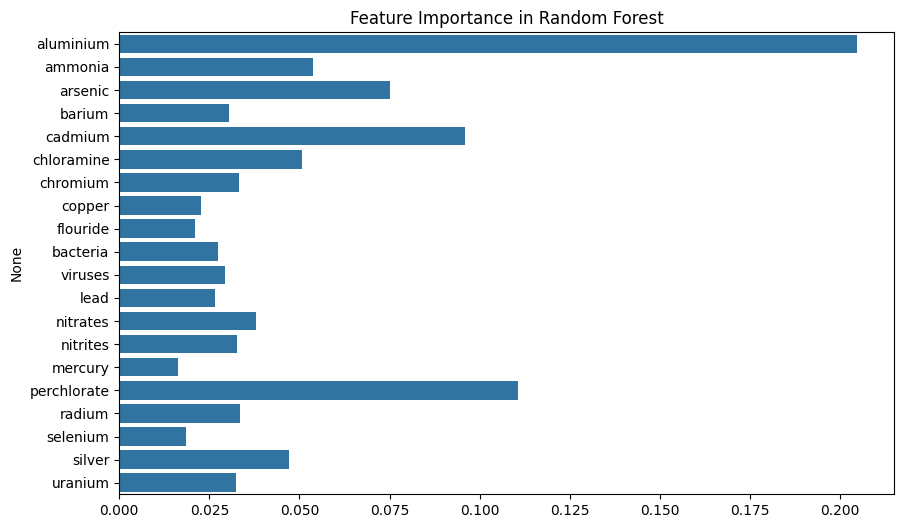

In [49]:
# Feature importance
importances = rf_classifier.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Random Forest')
plt.show()

Aluminium and Perchlorate stand out as the primary contributors to the prediction of the target variable (is_safe). These variables are key in determining whether the classification is safe or unsafe in the model.

Other features also contribute to the predictions, but their importance is relatively smaller.

Low-importance features might not add much predictive value to the model.

#Hyperparameter Turning the Random Forest

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],  # Reduce the range of trees
    'max_depth': [10, 20],  # Reduce the depth range
    'min_samples_split': [5],  # Keep a single value
    'min_samples_leaf': [2],  # Keep a single value
    'bootstrap': [True]  # Use only True or False, not both
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.954618989738771


In [52]:
# Evaluate optimized model
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Convert y_pred_optimized to integer type
y_pred_optimized = y_pred_optimized.astype(int)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

Optimized Accuracy: 0.9524802000833681


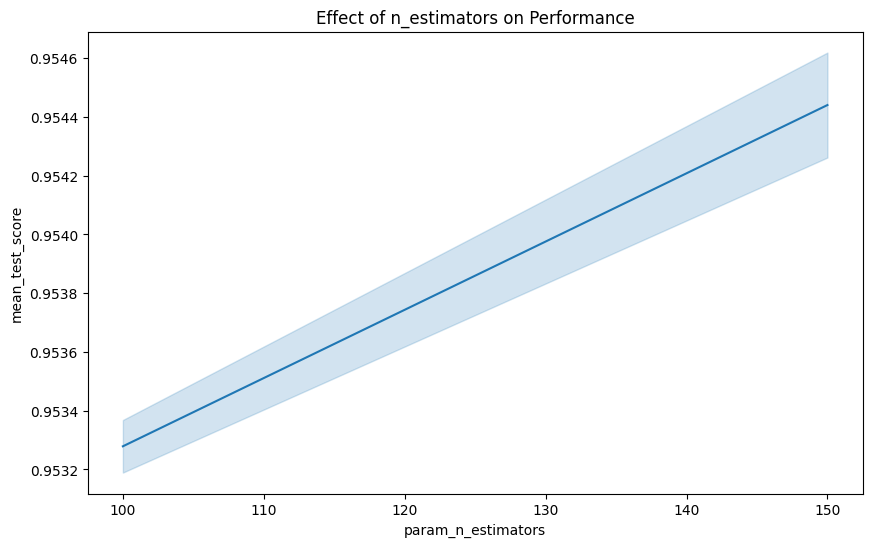

In [56]:
# performance of different hyperparameters.
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))

# Plot the relationship between n_estimators and mean test score
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results)
plt.title('Effect of n_estimators on Performance')
plt.show()

The plot showing the impact of n_estimators revealed that performance improved slightly with more trees but plateaued as the number of trees increased. This highlights the balance between improving performance and computational cost. After about 120 trees, the performance gains are minimal.


# Testing the model

In [53]:
# creating a new data point with the same features for testing the model

new_data_point = {
    'aluminium': 0.1,
    'ammonia': 0.3,
    'arsenic': 0.02,
    'barium': 0.1,
    'cadmium': 0.001,
    'chloramine': 0.3,
    'chromium': 0.05,
    'copper': 0.02,
    'flouride': 0.01,
    'bacteria': 0.005,
    'viruses': 0.001,
    'lead': 0.003,
    'nitrates': 0.04,
    'nitrites': 0.02,
    'mercury': 0.0002,
    'perchlorate': 0.01,
    'radium': 0.0005,
    'selenium': 0.1,
    'silver': 0.0001,
    'uranium': 0.002
}

# Convert new data point to a DataFrame
new_data_df = pd.DataFrame([new_data_point])

In [54]:
# Predict with the trained model
new_prediction = best_rf.predict(new_data_df)

# Output prediction
if new_prediction[0] == 1:
    print("The water is predicted to be safe.")
else:
    print("The water is predicted to be unsafe.")

The water is predicted to be unsafe.
